
#### Daniel Oltean, Learning words: An exploratory data analysis of the datasets "Age of acquisition" and "Concreteness


#### Summary:
1. Introduction
2. Age of acquisition: 2.1 Rating.Mean; 2.2 Freq_pm; 2.3 Dunno (do/does not know)
3. Concreteness: 3.1 Conc.M; 3.2 Dom_Pos; 3.3 Percent_known and SUBTLEX
4. Age of acquisition and concreteness
5. Ways to augment the datasets: 5.1 Word length; 5.2 Word sentiment analysis
6. Conclusion

### 1. Introduction
In this project, I explore the first and third datasets constructed by the Center for Reading Research, Ghent, "Age of acquisition" and "Concreteness".

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

First of all, those datasets are downloaded on my computer and read as dataframes (df1 and df3) in Pandas:

In [314]:
df1 = pd.read_excel('C:/Users/danie/Desktop/DH 2022-2023/SCRIPTING LANGUAGES = PYTHON/PROJECT/AoA_ratings_Kuperman_et_al_BRM.xlsx')
df1

,Word,OccurTotal,OccurNum,Freq_pm,Rating.Mean,Rating.SD,Dunno
0,a,22,22,20415.274510,2.893384,1.21,1.000000
1,aardvark,18,18,0.411765,9.890000,3.66,1.000000
2,abacus,20,13,0.235294,8.690000,3.77,0.650000
3,abalone,18,13,0.509804,12.230000,3.54,0.722222
4,abandon,19,19,8.098039,8.320000,2.75,1.000000
...,...,...,...,...,...,...,...
31119,zoom,37,37,3.549020,8.570000,3.30,1.000000
31120,zoon,19,7,0.117647,12.430000,4.24,0.368421
31121,zucchini,19,19,0.960784,6.790000,3.82,1.000000
31122,zwieback,19,10,0.039216,16.100000,4.09,0.526316


In [315]:
df3 = pd.read_excel('C:/Users/danie/Desktop/DH 2022-2023/SCRIPTING LANGUAGES = PYTHON/PROJECT/Concreteness_ratings_Brysbaert_et_al_BRM.xlsx')
df3

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.962963,0,0
1,traindriver,0,4.54,0.71,3,29,0.896552,0,0
2,tush,0,4.45,1.01,3,25,0.880000,66,0
3,hairdress,0,3.93,1.28,0,29,1.000000,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.846154,0,0
...,...,...,...,...,...,...,...,...,...
39949,unenvied,0,1.21,0.62,1,30,0.966667,0,NaN
39950,agnostically,0,1.20,0.50,2,27,0.925926,0,NaN
39951,conceptualistic,0,1.18,0.50,4,26,0.846154,0,NaN
39952,conventionalism,0,1.18,0.48,1,29,0.965517,0,NaN


### 2. Age of acquisition
#### 2.1 Rating.Mean
I begin with the dataset "Age of acquisition". One of the first questions related to it is to know how many words we learn at different ages. It is, therefore, useful to count the words by age of acquisition: 

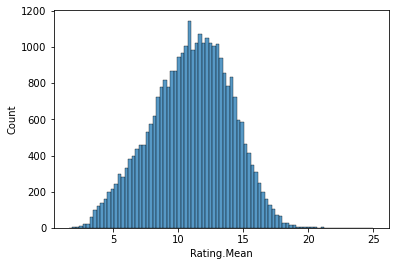

In [316]:
ax = sns.histplot(data=df1, x='Rating.Mean')
plt.show()

The age when we learn the most words is between 11 and 13 years. I calculate the mean (=the average value), median (=the midpoint value), and mode (=the most common value) ages, as indicated by this dataset:

In [317]:
mean_age = df1['Rating.Mean'].mean()
print(f'Mean age of acquisition: {mean_age} years')
median_age = df1['Rating.Mean'].median()
print(f'Median age of acquisition: {median_age} years')
mode_age = df1['Rating.Mean'].mode()
print(f"Mode age of acquisition: {mode_age[0]} years")

Mean age of acquisition: 11.000033067416808 years
Median age of acquisition: 11.17 years
Mode age of acquisition: 13.0 years


A similar image can be obtained by adding a new column containing the two-year stages of childhood/youthhood. I change, therefore, a continous variable ('Rating.Mean') with a categorical one ('Stage'), which will be useful in the fourth part of this project). I define a function called "stage", which checks if the values of 'Rating.Mean' are numerical: 

In [318]:
def stage(float_number):
    try:
        integer_number = int(float_number)
    except:
        return None
    else:
        if integer_number%2 == 0:
            stage = integer_number + 2
        else:
            stage = integer_number + 1
        return stage
df1['Stage'] = df1['Rating.Mean'].apply(stage)

I create a new dataframe (df1_words_stage) containing for each stage the ratio between the number of words acquired at this stage and the total number of words:

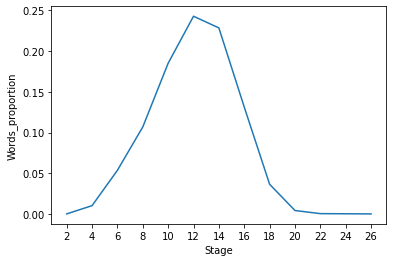

In [319]:
# Number of words:
len_df1 = len(df1.index)
# Number of words in each stage converted to a dataframe:
df1_words_stage = df1['Stage'].value_counts().to_frame().reset_index()
# New column names:
df1_words_stage.columns = ['Stage', 'Words_proportion']
# Number of words changed with ratio:
df1_words_stage.Words_proportion = df1_words_stage.Words_proportion/len_df1

ax = sns.lineplot(data=df1_words_stage, x='Stage', y='Words_proportion')
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26])
plt.show()

It is also interesting to list the first words we learn:

In [320]:
min_age = min(df1['Rating.Mean'])
first_words = df1['Word'].loc[df1['Rating.Mean'] < min_age+1]
print(f'First words we learn (between {min_age} and {(min_age+1)} years):')
print(first_words.to_string(index=False))

First words we learn (between 1.58 and 2.58 years):
bantling
   daddy
    mama
     mom
   momma
   mommy
     nap
    ouch
   potty
   spoon
   water
     wet
     yes


As well as the last ones:

In [321]:
max_age = max(df1['Rating.Mean'])
last_words = df1['Word'].loc[df1['Rating.Mean'] > max_age-5]
print(f'Last words we learn (between {max_age-5} and {max_age} years):')
print(last_words.to_string(index=False))

Last words we learn (between 20.0 and 25.0 years):
      architrave
     calceolaria
      eisteddfod
           kendo
       oubliette
          penury
     schottische
thrombocytopenia


#### 2.2 Freq_pm
A second column of interest is "Freq_pm", which measures the words' frequency in current language. As expected, there is a good (negative) correlation between frequency and age of acquisition: the words often used are acquired at an early age. I use the logarithmic scale to show this interdependency:

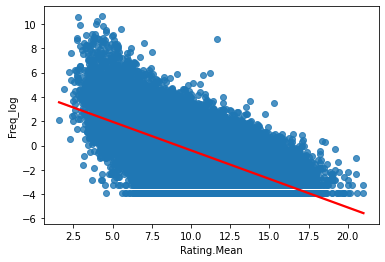

Correlation between words' frequency and age of acquisition: -0.6288057721588944


In [322]:
# I define a function that gives the logarithm and use it with "apply" to add the column "Freq_log": 
def calc_log(number):
    return math.log(number)
df1['Freq_log'] = df1['Freq_pm'].apply(calc_log)
ax = sns.regplot(data=df1, y='Freq_log', x='Rating.Mean', line_kws={"color": "red"})
plt.show()
correlation = df1['Freq_log'].corr(df1['Rating.Mean'])
print(f"Correlation between words' frequency and age of acquisition: {correlation}")

#### 2.3 Dunno (do/does not know)
The column "Dunno" contains the ratio of valid responses to total responses (so, it has values between 0 and 1). It measures the responders' familiarity with words, with the lowest values indicating that the word is less-known. I show the values and indicate some less-known words:

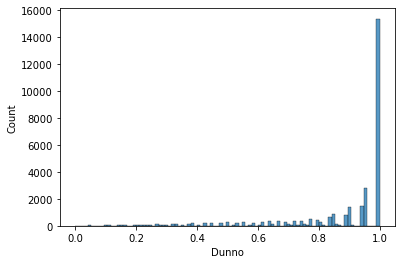

In [323]:
ax = sns.histplot(data=df1, x='Dunno')
plt.show()

In [324]:
words_less_known = df1[['Word', 'Rating.Mean', 'Dunno']].loc[df1['Dunno'] == 0]
print('Less-known words:')
print(words_less_known.to_string(index=False))

Less-known words:
       Word  Rating.Mean  Dunno
   actinium          NaN    0.0
  ambuscade          NaN    0.0
     ashlar          NaN    0.0
      bosky          NaN    0.0
   canaille          NaN    0.0
    compeer          NaN    0.0
   europium          NaN    0.0
gallimaufry          NaN    0.0
    hutment          NaN    0.0
    karakul          NaN    0.0
      kedge          NaN    0.0
       kyat          NaN    0.0
 peculation          NaN    0.0
     pother          NaN    0.0
   rogation          NaN    0.0
     smilax          NaN    0.0
    thulium          NaN    0.0
    wickiup          NaN    0.0
   williwaw          NaN    0.0


I figure out the relationship between the familiarity with words and the age of acquisition. As expected, there is a negative correlation. The words less known are acquired at higher ages:

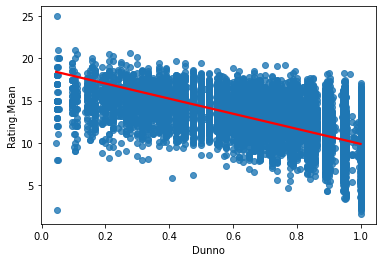

Correlation between word recognition and age of acquisition: -0.5801115873211714


In [325]:
ax = sns.regplot(data=df1, x='Dunno', y='Rating.Mean', line_kws={"color": "red"})
plt.show()
correlation = df1['Dunno'].corr(df1['Rating.Mean'])
print(f'Correlation between word recognition and age of acquisition: {correlation}')

### 3. Concreteness
#### 3.1 Conc.M
The next dataset I explore contains words' "concreteness". This value estimates the degree to which the concept denoted by a word refers to a perceptible entity. The dataset uses a 5-point rating scale going from abstract (0) to concrete (5).
I begin by visualising the number of words by concreteness and listing some very abstract/concrete words:

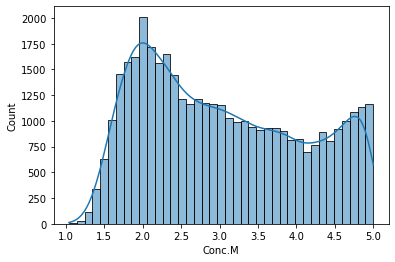

In [326]:
ax = sns.histplot(data=df3, x='Conc.M', kde=True)
plt.show()

In [327]:
abstract_words = df3[['Word', 'Conc.M']].loc[(df3['Conc.M'] < 1.2) & (df3['Word'] != 'nan')]
print('Abstract words:')
print(abstract_words.to_string(index=False))

Abstract words:
           Word  Conc.M
   enlightening    1.19
        perhaps    1.19
    spiritually    1.14
             if    1.19
       although    1.07
     whatsoever    1.17
             eh    1.04
         belief    1.19
   spirituality    1.07
       idealize    1.19
          would    1.12
conceptualistic    1.18
conventionalism    1.18
  essentialness    1.04


In [328]:
concrete_words = df3[['Word', 'Conc.M']].loc[(df3['Conc.M'] == 5) & (df3['Word'] != 'nan')]
print('Concrete words:')
concrete_words

Concrete words:


,Word,Conc.M
16,sled,5.0
8114,daisy,5.0
8115,peacock,5.0
8116,quill,5.0
8117,thorn,5.0
...,...,...
28800,tv,5.0
28801,waffle iron,5.0
28802,wedding gown,5.0
28803,wine bottle,5.0


#### 3.2 Dom_Pos 

I remark that column "Dom_Pos" contains the type of words. I choose only the nouns, adjectives, and verbs to show their degree of concreteness using both boxplots and histograms. I also calculate the mean concreteness of each category. As expected, the adjectives are the less concrete words among them:

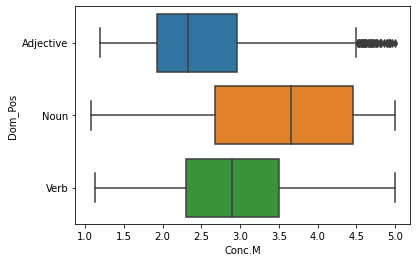

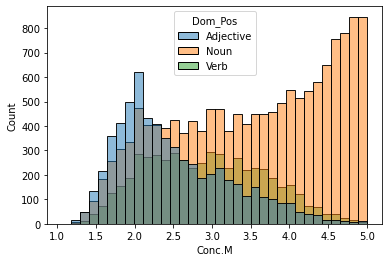

In [329]:
df3_nouns_adjectives_verbs = df3.loc[df3['Dom_Pos'].isin(['Noun','Adjective','Verb'])]
ax=sns.boxplot(x='Conc.M', y='Dom_Pos', data=df3_nouns_adjectives_verbs)
plt.show()

ax=sns.histplot(data=df3_nouns_adjectives_verbs, x='Conc.M', hue='Dom_Pos')
plt.show()


In [330]:
series=df3_nouns_adjectives_verbs.groupby('Dom_Pos')['Conc.M'].mean()
print('Mean concreteness:')
for i,r in series.items():
    print(f'\t- {i}s: {r}')

Mean concreteness:
	- Adjectives: 2.4957313481675394
	- Nouns: 3.5295326206140354
	- Verbs: 2.923374930154591


#### 3.3 Percent_known and SUBTLEX
The dataset contains two other useful parameters: "percent_known", which indicates the knowledge of the words' meaning in percentages (so, between 0 and 1) and "SUBTLEX", counting the frequencies of the words (estimated from American English movie subtitles on a total of 51 million). The last one is similar to "Freq_pm" (df1). 
I create a list of the most used and known words:

In [331]:
my_list = df3.loc[(df3['Percent_known'] == 1) & (df3['SUBTLEX'] > 100000)]['Word'].tolist()
print(my_list)

['good', 'back', 'up', 'right', 'well', 'here', 'out', 'okay', 'why', 'just', 'now', 'how', 'the', 'but', 'when', 'and', 'as', 'if', 'all', 'this', 'what', 'that', 'there', 'no', 'yes', 'yeah', 'oh', 'not', 'one', 'on', 'in', 'at', 'with', 'like', 'from', 'about', 'of', 'for', 'me', 'you', 'he', 'I', 'him', 'she', 'his', 'we', 'her', 'they', 'your', 'who', 'to', 'can', 'see', 'go', 'come', 'going', 'will', 'do', 'did', 'think', 'get', 'let', 'have', 'are', 'want', 'was', 'know', 'is']


Obviously, there is a relationship between words' knowledge and frequency. It is better observed in the case of the less-used words: 

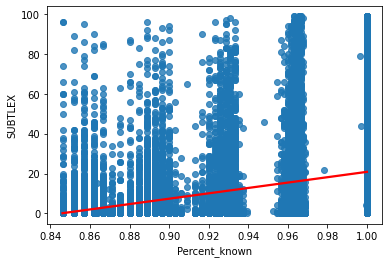

Correlation between knowledge and usage in the case of the less-used words: 0.2773828606305575


In [332]:
ax = sns.regplot(data=df3.loc[df3['SUBTLEX'] < 100], x='Percent_known', y='SUBTLEX', line_kws={"color": "red"})
plt.show()
correlation = df3['Percent_known'].corr(df3.loc[df3['SUBTLEX'] < 100]['SUBTLEX'])
print(f'Correlation between knowledge and usage in the case of the less-used words: {correlation}')

I also wonder if there is a correlation between words' knowledge/usage and their concreteness. Indeed, there is a small interdependency between those parameters:

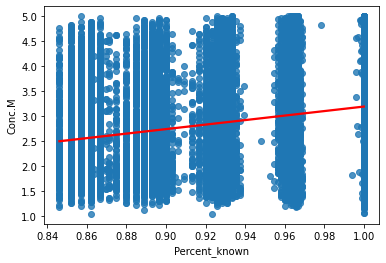

Correlation between knowledge and concreteness: 0.19593316589232812


In [333]:
ax = sns.regplot(data=df3, x='Percent_known', y='Conc.M', line_kws={"color": "red"})
plt.show()
correlation = df3['Percent_known'].corr(df3['Conc.M'])
print(f'Correlation between knowledge and concreteness: {correlation}')

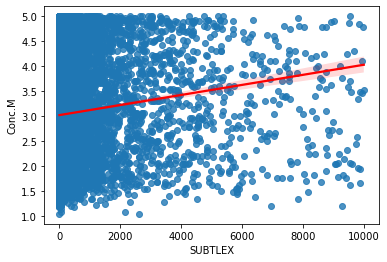

Correlation between frequency and concreteness in the case of the less-used words: 0.07077435762840528


In [334]:
ax = sns.regplot(data=df3.loc[df3['SUBTLEX'] < 10000], x='SUBTLEX', y='Conc.M', line_kws={"color": "red"})
plt.show()
correlation = df3.loc[df3['SUBTLEX'] < 10000]['SUBTLEX'].corr(df3['Conc.M'])
print(f'Correlation between frequency and concreteness in the case of the less-used words: {correlation}')

### 4. Age of acquisition and concreteness
It is helpful to combine the two datasets already discussed to identify more elements for this analysis.

In [335]:
df1_3 = pd.merge(df1, df3, how='inner', left_on='Word', right_on='Word')
print(f'Columns of the new dataframe:\n{list(df1_3)}')
print(f'\nNumber of rows:\n{len(df1_3)}')

Columns of the new dataframe:
['Word', 'OccurTotal', 'OccurNum', 'Freq_pm', 'Rating.Mean', 'Rating.SD', 'Dunno', 'Stage', 'Freq_log', 'Bigram', 'Conc.M', 'Conc.SD', 'Unknown', 'Total', 'Percent_known', 'SUBTLEX', 'Dom_Pos']

Number of rows:
23860


First, I am interested in the relationship between words' concreteness and their age of acquisition. As expected, there is a good negative correlation between them. We learn concrete words at a young age and abstract words at an advanced one:

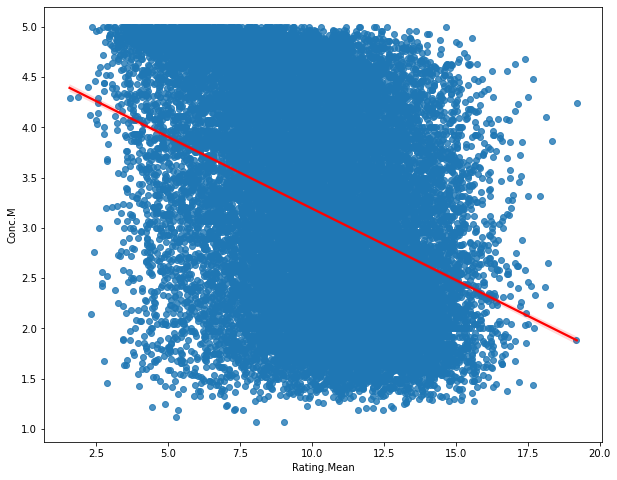

Correlation between concreteness and age of acquisition: -0.37873016240400925


In [336]:
plt.figure(figsize=(10, 8))
ax = sns.regplot(data=df1_3, y='Conc.M', x='Rating.Mean', line_kws={"color": "red"})
plt.show()
correlation = df1_3['Rating.Mean'].corr(df1_3['Conc.M'])
print(f'Correlation between concreteness and age of acquisition: {correlation}')

The same dependency is observed between words' knowledge and their age of acquisition. The best-known words are acquired at an early age:

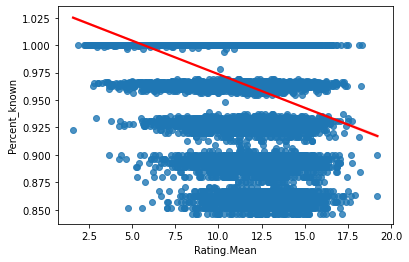

Correlation between knowledge and age of acquisition: -0.412136772132772


In [337]:
ax = sns.regplot(data=df1_3, y='Percent_known', x='Rating.Mean', line_kws={"color": "red"})
plt.show()
correlation = df1_3['Rating.Mean'].corr(df1_3['Percent_known'])
print(f'Correlation between knowledge and age of acquisition: {correlation}')

Similarly, the most frequently used words are acquired at an early age:

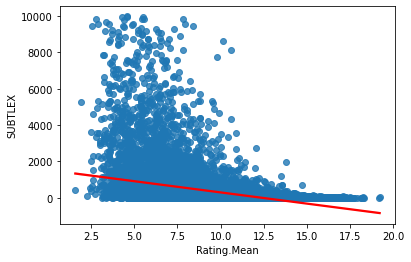

Correlation between words frequency and age of acquisition: -0.3851724305571473


In [338]:
ax = sns.regplot(data=df1_3.loc[df1_3['SUBTLEX'] < 10000], y='SUBTLEX', x='Rating.Mean', line_kws={"color": "red"})
plt.show()
correlation = df1_3.loc[df1_3['SUBTLEX'] < 10000]['SUBTLEX'].corr(df1_3['Rating.Mean'])
print(f'Correlation between words frequency and age of acquisition: {correlation}')

There also must be a correlation between the knowledge of words' age of acquisition (df1.Dunno) and the knowledge of their meaning (df3.Percent_known):

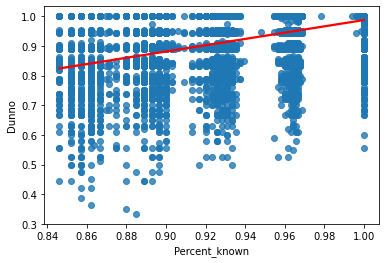

Correlation between words recognition and knowledge: 0.576428098146143


In [339]:
ax = sns.regplot(data=df1_3, x='Percent_known', y='Dunno', line_kws={"color": "red"})
plt.show()
correlation = df1_3['Dunno'].corr(df1_3['Percent_known'])
print(f'Correlation between words recognition and knowledge: {correlation}')

Finally, I am interested in the relationship between the type of words and their age of acquisition. I select nouns, adjectives, verbs, and pronouns in a new dataframe containing only the columns of interest:

In [340]:
df1_3_words = df1_3.loc[df1_3['Dom_Pos'].isin(['Noun','Adjective','Verb','Pronoun'])][['Word', 'Rating.Mean', 'Stage', 'Dom_Pos']]
df1_3_words

,Word,Rating.Mean,Stage,Dom_Pos
1,aardvark,9.89,10.0,Noun
2,abacus,8.69,10.0,Noun
3,abandon,8.32,10.0,Verb
4,abandoner,11.89,12.0,Noun
5,abandonment,10.27,12.0,Noun
...,...,...,...,...
23855,zoological,12.45,14.0,Adjective
23856,zoologist,11.06,12.0,Noun
23857,zoology,10.25,12.0,Noun
23858,zoom,8.57,10.0,Verb


The age of acquisition of those four types of words can be visualized with both boxplots and histograms:

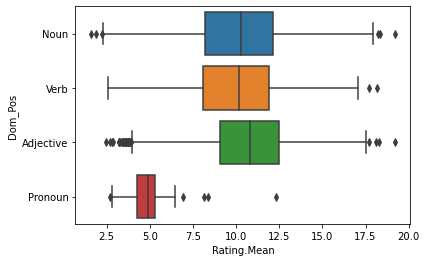

In [341]:
ax=sns.boxplot(x='Rating.Mean', y='Dom_Pos', data=df1_3_words)
plt.show()


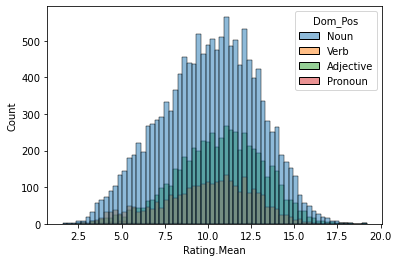

In [342]:
ax=sns.histplot(data=df1_3_words, x='Rating.Mean', hue='Dom_Pos')
plt.show()

In [343]:
series=df1_3_words.groupby('Dom_Pos')['Rating.Mean'].mean()
print('Mean age of acquisition:')
for i,r in series.items():
    print(f'\t- {i}s: {r} years')

Mean age of acquisition:
	- Adjectives: 10.703185352701325 years
	- Nouns: 10.104263367077031 years
	- Pronouns: 5.057323913043478 years
	- Verbs: 9.883675623943185 years


I use the two categorical variables to calculate and visualize the proportion of each category of words at different stages:

In [344]:
df1_3_words_proportions = pd.crosstab(df1_3_words['Stage'], df1_3_words['Dom_Pos'], normalize=True)
df1_3_words_proportions

Dom_Pos,Adjective,Noun,Pronoun,Verb
Stage,,,,
2.0,0.000000,0.000087,0.000000,0.000000
4.0,0.001385,0.008440,0.000390,0.001948
6.0,0.008570,0.042980,0.001298,0.011600
8.0,0.025234,0.090634,0.000173,0.017010
10.0,0.059600,0.142140,0.000087,0.029649
12.0,0.077952,0.163348,0.000000,0.036920
14.0,0.059167,0.119546,0.000043,0.025277
16.0,0.020646,0.042763,0.000000,0.005237
18.0,0.002078,0.005194,0.000000,0.000303


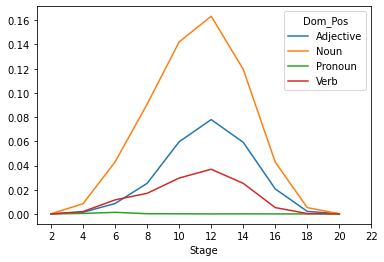

In [345]:
ax=df1_3_words_proportions.plot()
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.show()

It is helpful to focus on pronouns and their age of acquisition. I list, therefore, the pronouns acquired at every stage:

In [346]:
my_dictionary = {}
for index, rows in df1_3_words.loc[df1_3_words['Dom_Pos'] == 'Pronoun'].iterrows():
    if rows.Stage not in my_dictionary:
        my_dictionary[rows.Stage] = [rows.Word]
    else:
        my_dictionary[rows.Stage].append(rows.Word)
print('Prounouns acquired by age:')    
for key in sorted(my_dictionary):
    print(f'- before {int(key)} years: {my_dictionary[key]}')

Prounouns acquired by age:
- before 4 years: ['he', 'him', 'his', 'I', 'me', 'my', 'myself', 'she', 'who']
- before 6 years: ['anybody', 'anyone', 'each', 'everybody', 'everyone', 'everything', 'her', 'hers', 'himself', 'it', 'mine', 'nobody', 'none', 'nothing', 'our', 'ours', 'plenty', 'somebody', 'someone', 'something', 'their', 'them', 'themselves', 'they', 'us', 'we', 'you', 'your', 'yours', 'yourself']
- before 8 years: ['anything', 'herself', 'itself', 'whoever']
- before 10 years: ['ourselves', 'whom']
- before 14 years: ['nil']


As expected, the pronoun "I" is acquired before "you". I list some examples:

In [347]:
my_list = ['I', 'my', 'me', 'myself', 'you', 'your', 'yours', 'yourself']
print('Age of acquisition for "I" and "you" prounouns:') 
for word in my_list:
    print(f"{word}: {df1_3_words.loc[df1_3_words['Word'] == word]['Rating.Mean'].item()} years")

Age of acquisition for "I" and "you" prounouns:
I: 2.7901629999999997 years
my: 2.715564 years
me: 3.280385 years
myself: 3.813235 years
you: 4.346085 years
your: 4.100974000000001 years
yours: 4.505940000000001 years
yourself: 4.953534000000001 years


### 5. Ways to augment the datasets

#### 5.1 Word length
The first way to augment the dataset would be to calculate the length of the words and check if there is any correlation between that value and other parameters, especially the age of acquisition:

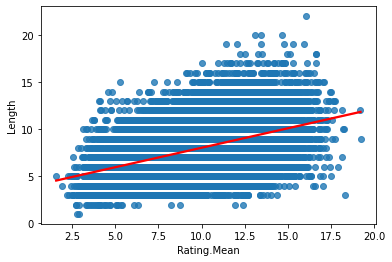

Correlation between word length and age of acquisition: 0.43672897808034356


In [348]:
def length_word(word):
    try:
        return len(word)
    except:
        return None
df1_3['Length'] = df1_3['Word'].apply(length_word)

ax = sns.regplot(data=df1_3, x='Rating.Mean', y='Length', line_kws={"color": "red"})
plt.show()
correlation = df1_3['Rating.Mean'].corr(df1_3['Length'])
print(f'Correlation between word length and age of acquisition: {correlation}')

#### 5.2 Word sentiment analysis
It is also possible to identify word sentiments and compare them with the age of acquisition thanks to TextBlob library. It contains the function "sentiment" with two properties: "polarity", which has values between 1 (positive statement) and -1 (negative statement), and "subjectivity", with values between 0 (very objective) and 1 (very subjective). I add two columns containing those parameters (using two functions that test the applicability of this method to our dataset) and then list some words of strong polarity:

In [349]:
def sentiment_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
def sentiment_subjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None
df1_3['Polarity'] = df1_3['Word'].apply(sentiment_polarity)
df1_3['Subjectivity'] = df1_3['Word'].apply(sentiment_subjectivity)

In [350]:
words_positive_polarity = df1_3[['Word', 'Rating.Mean', 'Polarity']].loc[df1_3['Polarity'] == 1]
print('Words with positive polarity:')
print(words_positive_polarity.to_string(index=False))

Words with positive polarity:
        Word  Rating.Mean  Polarity
     awesome     7.330000       1.0
        best     4.090317       1.0
breathtaking    11.000000       1.0
   delicious     6.500000       1.0
  delightful     9.720000       1.0
   excellent     7.370000       1.0
   exquisite    12.350000       1.0
   faultless    10.420000       1.0
    flawless     9.330000       1.0
  impressive     9.480000       1.0
   legendary     9.890000       1.0
 magnificent     8.630000       1.0
   marvelous     8.267861       1.0
   masterful    12.840000       1.0
     perfect     5.780000       1.0
   perfectly     6.157775       1.0
   priceless     9.760000       1.0
      superb    10.000000       1.0
   wonderful     6.470000       1.0


In [351]:
words_negative_polarity = df1_3[['Word', 'Rating.Mean', 'Polarity']].loc[df1_3['Polarity'] == -1]
print('Words with negative polarity:')
print(words_negative_polarity.to_string(index=False))

Words with negative polarity:
       Word  Rating.Mean  Polarity
      awful         6.26      -1.0
      bleak        10.94      -1.0
     boring         5.26      -1.0
      cruel         7.63      -1.0
devastating        11.06      -1.0
  disgusted         7.80      -1.0
 disgusting         6.06      -1.0
   dreadful         6.78      -1.0
       evil         6.71      -1.0
       grim         9.16      -1.0
   gruesome         8.60      -1.0
   horrible         5.81      -1.0
   horrific         9.80      -1.0
 hysterical        10.94      -1.0
     insane         7.96      -1.0
  insulting         8.50      -1.0
   menacing        10.84      -1.0
  miserable        10.11      -1.0
      nasty         6.00      -1.0
 outrageous         9.05      -1.0
   pathetic         9.15      -1.0
   ruthless        12.26      -1.0
   shocking         7.61      -1.0
   terrible         5.56      -1.0
 terrifying         8.33      -1.0
    vicious         9.53      -1.0


At first sight, it seems that the words with positive and negative polarity/sentiments are learned in an approximately equal proportion over time:

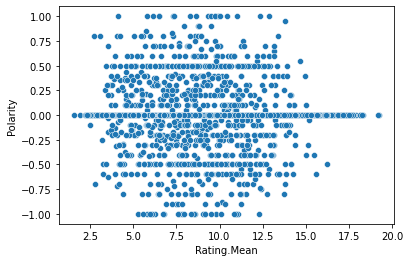

In [352]:
ax = sns.scatterplot(data=df1_3, x='Rating.Mean', y='Polarity')
plt.show()

However, if we count the words according to their polarity, the negative words exceed (a little) the positive ones almost at all ages:

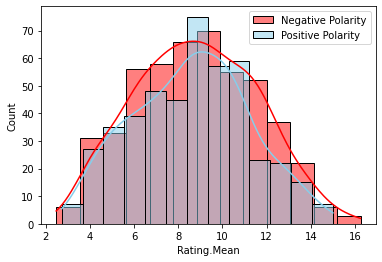

In [353]:
ax=sns.histplot(data=df1_3.loc[df1_3['Polarity'] < 0], x='Rating.Mean', kde=True, color='red', label='Negative Polarity')
ax=sns.histplot(data=df1_3.loc[df1_3['Polarity'] > 0], x='Rating.Mean', kde=True, color='skyblue', label='Positive Polarity')
plt.legend()
plt.show()

The result is more or less objective because, in our dataset, the total number of words with negative polarity exceeds that of the words with a positive one: 

In [354]:
count_positive_polarity = df1_3.loc[df1_3['Polarity'] > 0]['Word'].count()
print(f'Words with positive polarity: {count_positive_polarity}')
count_negative_polarity = df1_3.loc[df1_3['Polarity'] < 0]['Word'].count()
print(f'Words with negative polarity: {count_negative_polarity}')
count_polarity = df1_3.loc[df1_3['Polarity'] != 0]['Word'].count()
print(f'Words with polarity: {count_polarity}')

Words with positive polarity: 459
Words with negative polarity: 495
Words with polarity: 954


The same method is applied to subjectivity. Once again, the words are distributed in a uniform manner along the ages: 

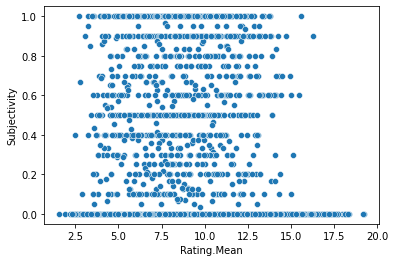

In [355]:
ax = sns.scatterplot(data=df1_3, x='Rating.Mean', y='Subjectivity')
plt.show()

However, the number of objective words far exceeds that of subjective ones:

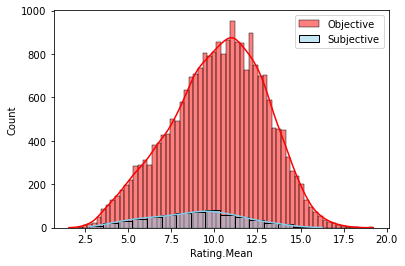

Objective words: 23102
Subjective words: 108


In [356]:
ax=sns.histplot(data=df1_3.loc[df1_3['Subjectivity'] < 0.5], x='Rating.Mean', kde=True, color='red', label='Objective')
ax=sns.histplot(data=df1_3.loc[df1_3['Subjectivity'] > 0.5], x='Rating.Mean', kde=True, color='skyblue', label='Subjective')
plt.legend()
plt.show()
count_objective_words = df1_3.loc[df1_3['Subjectivity'] < 0.5]['Word'].count()
print(f'Objective words: {count_objective_words}')
count_subjective_words = df1_3.loc[df1_3['Polarity'] > 0.5]['Word'].count()
print(f'Subjective words: {count_subjective_words}')

It is also helpful to see whether there is a correlation between polarity and subjectivity. In a new dataframe (df1_3_polarity), I select only the words with polarity different from zero and ignore the differences between positive and negative polarities converting integers to numerals. Indeed, there is a positive correlation between polarity and subjectivity. Words with higher polarity are more subjective:

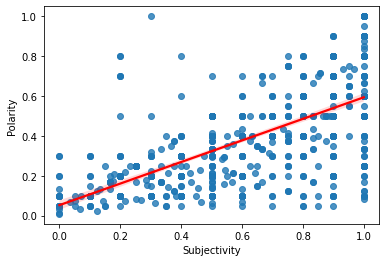

Correlation between polarity and subjectivity: 0.6536131416092613


In [357]:
df1_3_polarity = df1_3.loc[df1_3['Polarity'] != 0]
df1_3_polarity.Polarity = abs(df1_3_polarity.Polarity)
ax = sns.regplot(data=df1_3_polarity, x='Subjectivity', y='Polarity', line_kws={"color": "red"})
plt.show()
correlation = df1_3_polarity['Polarity'].corr(df1_3_polarity['Subjectivity'])
print(f'Correlation between polarity and subjectivity: {correlation}')

It is also useful to remark that there is no correlation between polarity/subjectivity and word recognition. In the case of polarity, for example:

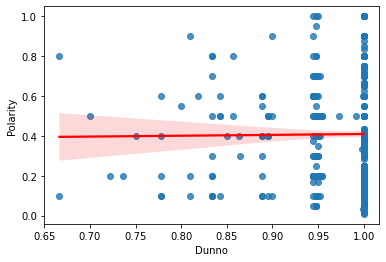

Correlation between polarity and word recognition: 0.007202665439854972


In [358]:
ax = sns.regplot(data=df1_3_polarity, x='Dunno', y='Polarity', line_kws={"color": "red"})
plt.show()
correlation = df1_3_polarity['Polarity'].corr(df1_3_polarity['Dunno'])
print(f'Correlation between polarity and word recognition: {correlation}')

I anticipate a strong negative correlation between the concreteness and the function "subjectivity" of TextBlob library (0=very objective, 1=very subjective). Unexpected, the absolute value of the negative correlation is very small: 

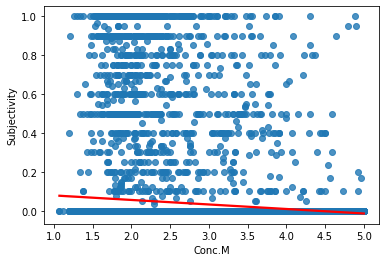

Correlation between concreteness and subjectivity: -0.1626424085300235


In [359]:
ax = sns.regplot(data=df1_3, x='Conc.M', y='Subjectivity', line_kws={"color": "red"})
plt.show()
correlation = df1_3['Subjectivity'].corr(df1_3['Conc.M'])
print(f'Correlation between concreteness and subjectivity: {correlation}')

### 6. Conclusion
The two datasets provide useful information concerning the words' age of acquisition and concreteness. I resume my investigation with some general remarks:


There is a negative correlation between the following: == age of acquisition and frequency; == age of acquisition and recognition of the age of acquisition; == age of acquisition and concreteness; == age of acquisition and word knowledge.


There is a positive correlation between the following: == age of acquisition and word length; == word knowledge and frequency; == word knowledge and concreteness; == frequency and concreteness; == word knowledge and recognition of the age of acquisition; == word polarity and subjectivity.
